# Figure 3.
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  08/21/2025          |
| Updated |  08/22/2025          |

Midplane radial profiles at $\theta_\mathrm{mid} \equiv \pi/2 = 0\degree$ latitude (cf. Figure 4).
Referring to the left vertical axis, the blue curve shows the density $\rho_\mathrm{sig}$ [equation (20)].
Referring to the right axis, the green curve shows the effective depth to peak stellar irradiation $\tau_*$ [equation (19)].

    r_0 = 17.0 au
H_0/R_0 = 0.07
  rho_0 = 8.56e-15 g/cm^3
      M = 1.30e-04 M_sun


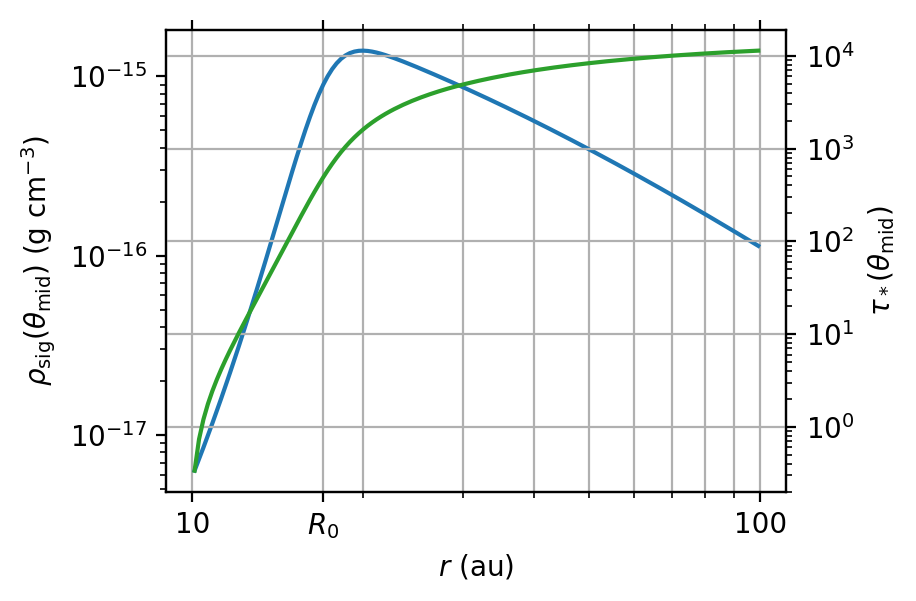

In [1]:
#===============================================================================
import athena_read
import matplotlib.pyplot as plt
import numpy as np

# Conversions
def r2au(r):
    return r*l_au

def rho2cgs(rho):
    return rho*density_unit

def mass2cgs(mass):
    return mass*density_unit*length_unit**3

def g2solar_mass(g):
    return g/1.988416e33

# Constants
au = 1.495978707e13                          # astronomical unit [cm]
rad2deg = 180/np.pi

# Read and plot
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
ax_tau = ax.twinx()
problem_id = 'dsharp'
root = '../athena/models/dsharp_abs-sca'
path = f'{root}/nfreq/64'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
density_unit = athinput['radiation']['density_unit']
length_unit = athinput['radiation']['length_unit']
r0 = athinput['problem']['r0']
rho0 = athinput['problem']['rho0']
p0_over_r0 = athinput['problem']['p0_over_r0']
l_au = length_unit/au
dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
          /athinput['mesh']['nx2']
theta_mid_deg = 90
j_mid = int(theta_mid_deg/rad2deg/dtheta)
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')

# Diagnostics
print(f'    r_0 = {r2au(r0):.1f} au')
print(f'H_0/R_0 = {np.sqrt(p0_over_r0):.2f}')
print(f'  rho_0 = {rho2cgs(rho0):.2e} g/cm^3')
m_disk = g2solar_mass(mass2cgs(2.83015e-02)) # from dsharp.hst
print(f'      M = {m_disk:.2e} M_sun')

# Density
ax.plot(athdf['x1v']*l_au, rho2cgs(athdf['rho'][0][j_mid, :]))

# Optical depth
f_star = 54
try:
    dtau = (athdf[f'Sigma_a_{f_star}'][0] + athdf[f'Sigma_s_{f_star}'][0])\
           *np.diff(athdf['x1f'])
except KeyError:
    dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)
ax_tau.plot(athdf['x1v']*l_au, tau_field[j_mid, :], color='tab:green')

# Format plots
ax.grid(axis='x', which='both')
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True)
ax.set(xscale='log', yscale='log', xlabel=r'$r$ (au)', xticks=[10, 17, 100],
       xticklabels=[10, r'$R_0$', 100],
       ylabel=r'$\rho_\mathrm{sig}(\theta_\mathrm{mid})$ (g cm$^{-3}$)')
ax_tau.grid()
ax_tau.set(ylabel=r'$\tau_*(\theta_\mathrm{mid})$', yscale='log')
plt.subplots_adjust(hspace=0.0)
plt.savefig('figs/midplane.pdf', bbox_inches='tight', pad_inches=0.01)
#===============================================================================